In [65]:
import pandas as pd
pd.options.display.max_columns = None
pd.options.display.max_rows = None

file_path = 'data/tgv_data.csv'

df = pd.read_csv(file_path, sep=';')
df.head()

,date,service,gare_depart,gare_arrivee,duree_moyenne,nb_train_prevu,nb_annulation,commentaire_annulation,nb_train_depart_retard,retard_moyen_depart,retard_moyen_tous_trains_depart,commentaire_retards_depart,nb_train_retard_arrivee,retard_moyen_arrivee,retard_moyen_tous_trains_arrivee,commentaires_retard_arrivee,nb_train_retard_sup_15,retard_moyen_trains_retard_sup15,nb_train_retard_sup_30,nb_train_retard_sup_60,prct_cause_externe,prct_cause_infra,prct_cause_gestion_trafic,prct_cause_materiel_roulant,prct_cause_gestion_gare,prct_cause_prise_en_charge_voyageurs
0,2018-01,National,BORDEAUX ST JEAN,PARIS MONTPARNASSE,141,870,5,NaN,289,11.247809,3.693179,NaN,147,28.436735,6.511118,NaN,110,6.511118,44,8,36.134454,31.092437,10.924370,15.966387,5.042017,0.840336
1,2018-01,National,LA ROCHELLE VILLE,PARIS MONTPARNASSE,165,222,0,NaN,8,2.875000,0.095796,NaN,34,21.524020,5.696096,NaN,22,5.696096,5,0,15.384615,30.769231,38.461538,11.538462,3.846154,0.000000
2,2018-01,National,PARIS MONTPARNASSE,QUIMPER,220,248,1,NaN,37,9.501351,1.003981,NaN,26,55.692308,7.578947,"Ce mois-ci, l'OD a été touchée par les inciden...",26,7.548387,17,7,26.923077,38.461538,15.384615,19.230769,0.000000,0.000000
3,2018-01,National,PARIS MONTPARNASSE,ST MALO,156,102,0,NaN,12,19.912500,1.966667,NaN,13,48.623077,6.790686,"Ce mois-ci, l'OD a été touchée par les inciden...",8,6.724757,6,4,23.076923,46.153846,7.692308,15.384615,7.692308,0.000000
4,2018-01,National,PARIS MONTPARNASSE,ST PIERRE DES CORPS,61,391,2,NaN,61,7.796995,0.886889,NaN,71,12.405164,3.346487,NaN,17,3.346487,6,0,21.212121,42.424242,9.090909,21.212121,6.060606,0.000000


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8154 entries, 0 to 8153
Data columns (total 26 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   date                                  8154 non-null   object 
 1   service                               8154 non-null   object 
 2   gare_depart                           8154 non-null   object 
 3   gare_arrivee                          8154 non-null   object 
 4   duree_moyenne                         8154 non-null   int64  
 5   nb_train_prevu                        8154 non-null   int64  
 6   nb_annulation                         8154 non-null   int64  
 7   commentaire_annulation                0 non-null      float64
 8   nb_train_depart_retard                8154 non-null   int64  
 9   retard_moyen_depart                   8154 non-null   float64
 10  retard_moyen_tous_trains_depart       8154 non-null   float64
 11  commentaire_retar

In [67]:
# Supprimer les colonnes vides ou partiellement remplies
df = df.drop(columns=['commentaire_annulation', 'commentaire_retards_depart', 'commentaires_retard_arrivee'])

In [68]:
df.describe()

,duree_moyenne,nb_train_prevu,nb_annulation,nb_train_depart_retard,retard_moyen_depart,retard_moyen_tous_trains_depart,nb_train_retard_arrivee,retard_moyen_arrivee,retard_moyen_tous_trains_arrivee,nb_train_retard_sup_15,retard_moyen_trains_retard_sup15,nb_train_retard_sup_30,nb_train_retard_sup_60,prct_cause_externe,prct_cause_infra,prct_cause_gestion_trafic,prct_cause_materiel_roulant,prct_cause_gestion_gare,prct_cause_prise_en_charge_voyageurs
count,8154.000000,8154.000000,8154.000000,8154.000000,8154.000000,8154.000000,8154.000000,8154.000000,8154.000000,8154.000000,8154.000000,8154.000000,8154.000000,8154.000000,8154.000000,8154.000000,8154.000000,8154.000000,8154.000000
mean,169.860314,257.198308,11.349644,88.434265,11.205745,3.076737,34.516066,33.950971,5.668612,24.434511,32.193823,11.642016,4.245892,23.266846,21.888418,19.052124,18.995179,6.714513,7.127315
std,87.390774,173.815703,26.544553,90.384803,12.476780,5.432676,29.729349,15.702663,7.971691,21.400761,20.195926,11.225104,4.901032,16.805192,15.692521,14.947548,14.256533,8.080759,10.249453
min,0.000000,0.000000,0.000000,0.000000,0.000000,-229.269444,0.000000,-40.109259,-472.638889,0.000000,-4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,100.000000,142.000000,0.000000,22.000000,5.128410,1.140258,13.000000,24.636941,3.129384,9.000000,12.140350,4.000000,1.000000,11.764706,11.538462,8.695652,9.523810,0.000000,0.000000
50%,164.000000,221.000000,3.000000,55.000000,9.036447,2.248271,27.000000,32.441236,4.962422,19.000000,34.932765,9.000000,3.000000,20.967742,20.000000,16.949153,17.165179,5.000000,3.703704
75%,221.000000,333.000000,10.000000,129.000000,14.219375,3.903651,47.000000,41.346717,7.673542,33.000000,44.268749,16.000000,6.000000,32.307692,30.000000,26.923077,26.086957,10.000000,10.000000
max,786.000000,1075.000000,297.000000,596.000000,316.188095,84.516667,376.000000,299.600000,92.000000,312.000000,299.600000,202.000000,71.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


## Missing dates

In [69]:
df.groupby(['gare_depart', 'gare_arrivee']).size()
df.groupby(['gare_depart', 'gare_arrivee']).size().reset_index(name='count').query('count < 66')


,gare_depart,gare_arrivee,count
10,BORDEAUX ST JEAN,PARIS VAUGIRARD,12
11,BORDEAUX ST JEAN,TOURCOING,64
36,MADRID,MARSEILLE ST CHARLES,45
41,MARSEILLE ST CHARLES,MADRID,45
44,MARSEILLE ST CHARLES,TOURCOING,65
51,NANTES,PARIS VAUGIRARD,12
85,PARIS LYON,ZURICH,65
106,PARIS VAUGIRARD,BORDEAUX ST JEAN,12
107,PARIS VAUGIRARD,NANTES,12
108,PARIS VAUGIRARD,RENNES,12


### Paris Vaugirard train station

In [70]:
df_vaugirard = df[(df['gare_arrivee'] == 'PARIS VAUGIRARD') | (df['gare_depart'] == 'PARIS VAUGIRARD')]
df_vaugirard.groupby(['gare_depart', 'gare_arrivee']).size()

gare_depart       gare_arrivee    
BORDEAUX ST JEAN  PARIS VAUGIRARD     12
NANTES            PARIS VAUGIRARD     12
PARIS VAUGIRARD   BORDEAUX ST JEAN    12
                  NANTES              12
                  RENNES              12
RENNES            PARIS VAUGIRARD     12
dtype: int64

In [71]:
df_vaugirard_nantes = df[((df['gare_depart'] == 'PARIS VAUGIRARD') | (df['gare_depart'] == 'PARIS MONTPARNASSE')) & (df['gare_arrivee'] == 'BORDEAUX ST JEAN') & (df['date'] == '2018-01')]
df_vaugirard_nantes

,date,service,gare_depart,gare_arrivee,duree_moyenne,nb_train_prevu,nb_annulation,nb_train_depart_retard,retard_moyen_depart,retard_moyen_tous_trains_depart,nb_train_retard_arrivee,retard_moyen_arrivee,retard_moyen_tous_trains_arrivee,nb_train_retard_sup_15,retard_moyen_trains_retard_sup15,nb_train_retard_sup_30,nb_train_retard_sup_60,prct_cause_externe,prct_cause_infra,prct_cause_gestion_trafic,prct_cause_materiel_roulant,prct_cause_gestion_gare,prct_cause_prise_en_charge_voyageurs
106,2018-01,National,PARIS MONTPARNASSE,BORDEAUX ST JEAN,143,775,7,148,9.377815,1.58253,79,25.479114,2.546962,45,2.546962,21,4,21.666667,25.0,11.666667,40.0,1.666667,0.0
113,2018-01,National,PARIS VAUGIRARD,BORDEAUX ST JEAN,165,63,1,12,22.318056,3.89328,5,44.550000,3.429570,4,3.429570,3,1,60.000000,0.0,0.000000,40.0,0.000000,0.0


Tous les trajets qui impliquent la gare PARIS VAUGIRARD n'ont lieu qu'en 2018. Plus aucun trajet ensuite. On peut donc supprimer ces lignes du df.

In [72]:
df = df[(df['gare_depart'] != 'PARIS VAUGIRARD') & (df['gare_arrivee'] != 'PARIS VAUGIRARD')]

In [73]:
df.groupby(['gare_depart', 'gare_arrivee']).size().reset_index(name='count').query('count < 66')
# df_with_data.groupby(['gare_depart', 'gare_arrivee']).size().reset_index(name='count')

,gare_depart,gare_arrivee,count
10,BORDEAUX ST JEAN,TOURCOING,64
35,MADRID,MARSEILLE ST CHARLES,45
40,MARSEILLE ST CHARLES,MADRID,45
43,MARSEILLE ST CHARLES,TOURCOING,65
83,PARIS LYON,ZURICH,65
118,TOURCOING,BORDEAUX ST JEAN,64
119,TOURCOING,MARSEILLE ST CHARLES,13
123,ZURICH,PARIS LYON,65


### Dealing with Tourcoing - Marseille, Madrid - Marseille, Marseille - Madrid

In [74]:
df_tourcoingmarseille = df[(df['gare_depart'] == 'TOURCOING') & (df['gare_arrivee'] == 'MARSEILLE ST CHARLES')]

# Filter the DataFrame to keep rows where the trip is not from TOURCOING to MARSEILLE ST CHARLES
df = df[~((df['gare_depart'] == 'TOURCOING') & (df['gare_arrivee'] == 'MARSEILLE ST CHARLES'))]


In [75]:
df_madrid_marseille = df[((df['gare_depart'] == 'MADRID') & (df['gare_arrivee'] == 'MARSEILLE ST CHARLES')) 
                         | ((df['gare_depart'] == 'MARSEILLE ST CHARLES') & (df['gare_arrivee'] == 'MADRID'))]
df_madrid_marseille

,date,service,gare_depart,gare_arrivee,duree_moyenne,nb_train_prevu,nb_annulation,nb_train_depart_retard,retard_moyen_depart,retard_moyen_tous_trains_depart,nb_train_retard_arrivee,retard_moyen_arrivee,retard_moyen_tous_trains_arrivee,nb_train_retard_sup_15,retard_moyen_trains_retard_sup15,nb_train_retard_sup_30,nb_train_retard_sup_60,prct_cause_externe,prct_cause_infra,prct_cause_gestion_trafic,prct_cause_materiel_roulant,prct_cause_gestion_gare,prct_cause_prise_en_charge_voyageurs
27,2018-01,International,MADRID,MARSEILLE ST CHARLES,481,16,1,6,3.500000,1.000000,3,20.272222,7.255556,3,7.255556,0,0,0.000000,0.000000,66.666667,33.333333,0.000000,0.000000
102,2018-01,International,MARSEILLE ST CHARLES,MADRID,464,15,0,1,13.966667,1.165556,3,28.000000,3.200000,3,3.200000,1,0,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000
178,2018-02,International,MARSEILLE ST CHARLES,MADRID,464,27,0,6,7.763889,1.929630,4,23.750000,0.814815,4,0.814815,1,0,66.666667,0.000000,33.333333,0.000000,0.000000,0.000000
232,2018-02,International,MADRID,MARSEILLE ST CHARLES,481,27,0,13,9.384615,4.333333,5,30.843333,8.464815,5,8.464815,2,0,40.000000,0.000000,20.000000,40.000000,0.000000,0.000000
290,2018-03,International,MARSEILLE ST CHARLES,MADRID,464,31,1,8,2.222917,0.743889,1,190.000000,4.266667,1,4.266667,1,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
342,2018-03,International,MADRID,MARSEILLE ST CHARLES,481,30,1,7,2.571429,0.241379,5,79.633333,15.576437,5,15.576437,4,3,20.000000,20.000000,60.000000,0.000000,0.000000,0.000000
419,2018-04,International,MARSEILLE ST CHARLES,MADRID,464,23,16,2,1.208333,0.383333,0,0.000000,-2.714286,0,-2.714286,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
473,2018-04,International,MADRID,MARSEILLE ST CHARLES,481,24,17,3,1.000000,0.285714,1,73.166667,12.335714,1,12.335714,1,1,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000
585,2018-05,International,MADRID,MARSEILLE ST CHARLES,205,30,17,0,0.000000,0.000000,3,62.227778,16.921795,3,16.921795,3,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
648,2018-05,International,MARSEILLE ST CHARLES,MADRID,202,25,14,0,0.000000,0.000000,3,26.666667,8.181818,3,8.181818,1,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


<ipython-input-76-0c5338233549>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['date'] = pd.to_datetime(filtered_df['date'], format='%Y-%m')


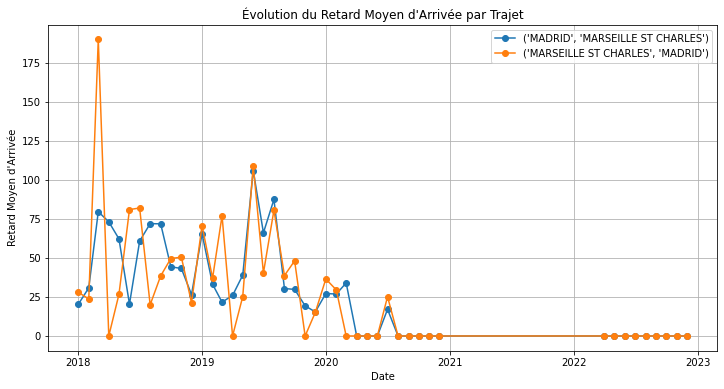

In [76]:
import pandas as pd
import matplotlib.pyplot as plt

# Liste des trajets d'intérêt
trajets = [
    ('MADRID', 'MARSEILLE ST CHARLES'),
    ('MARSEILLE ST CHARLES', 'MADRID')
]

# Filtrer le DataFrame pour les trajets spécifiques en utilisant isin()
filtered_df = df[df[['gare_depart', 'gare_arrivee']].apply(tuple, axis=1).isin(trajets)]

# Convertir la colonne 'date' en type datetime si ce n'est pas déjà le cas
filtered_df['date'] = pd.to_datetime(filtered_df['date'], format='%Y-%m')

# Grouper par paire de gares et date, puis calculer le retard moyen d'arrivée
grouped = filtered_df.groupby(['gare_depart', 'gare_arrivee', 'date'])['retard_moyen_arrivee'].mean()

# Créer un graphique pour chaque trajet
plt.figure(figsize=(12, 6))

for trajet, data in grouped.groupby(['gare_depart', 'gare_arrivee']):
    plt.plot(data.index.get_level_values('date'), data.values, marker='o', linestyle='-', label=trajet)

plt.title('Évolution du Retard Moyen d\'Arrivée par Trajet')
plt.xlabel('Date')
plt.ylabel('Retard Moyen d\'Arrivée')
plt.legend()
plt.grid(True)
plt.show()


In [77]:
df = df[~((df['gare_depart'] == 'MADRID') & (df['gare_arrivee'] == 'MARSEILLE ST CHARLES') | ((df['gare_depart'] == 'MARSEILLE ST CHARLES') & (df['gare_arrivee'] == 'MADRID')))]

In [78]:
df.groupby(['gare_depart', 'gare_arrivee']).size().reset_index(name='count').query('count < 66')

,gare_depart,gare_arrivee,count
10,BORDEAUX ST JEAN,TOURCOING,64
41,MARSEILLE ST CHARLES,TOURCOING,65
81,PARIS LYON,ZURICH,65
116,TOURCOING,BORDEAUX ST JEAN,64
120,ZURICH,PARIS LYON,65


In [79]:
# Sauvegarder le DataFrame prétraité dans un fichier CSV
df.to_csv("data/preprocessed_tgv_data.csv", index=False)